In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split

In [4]:
wine = load_wine()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [8]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(x_train, y_train)
rfc = rfc.fit(x_train, y_train)
score_c = clf.score(x_test, y_test)
score_r = rfc.score(x_test, y_test)

score_c

0.9629629629629629

In [9]:
score_r

0.9629629629629629

0.9777777777777779
0.865032679738562


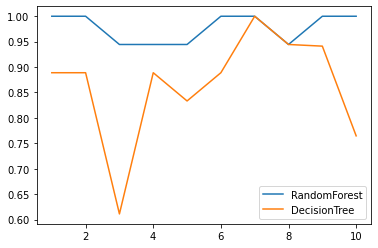

In [10]:
from sklearn.model_selection import cross_val_score

label = "RandomForest"
for model in [RandomForestClassifier(n_estimators=25), DecisionTreeClassifier()]:
    score = cross_val_score(model, wine.data, wine.target, cv=10)
    print(score.mean())
    plt.plot(range(1,11), score, label = label)
    plt.legend()
    label = "DecisionTree"

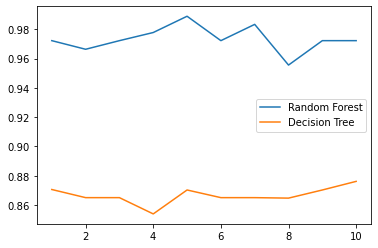

In [17]:
rfc_1 = []
clf_1 = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10).mean()
    rfc_1.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf, wine.data, wine.target, cv=10).mean()
    clf_1.append(clf_s)
    
plt.plot(range(1,11),rfc_1,label = "Random Forest")
plt.plot(range(1,11),clf_1,label = "Decision Tree")
plt.legend()
plt.show()

0.9888888888888889 32


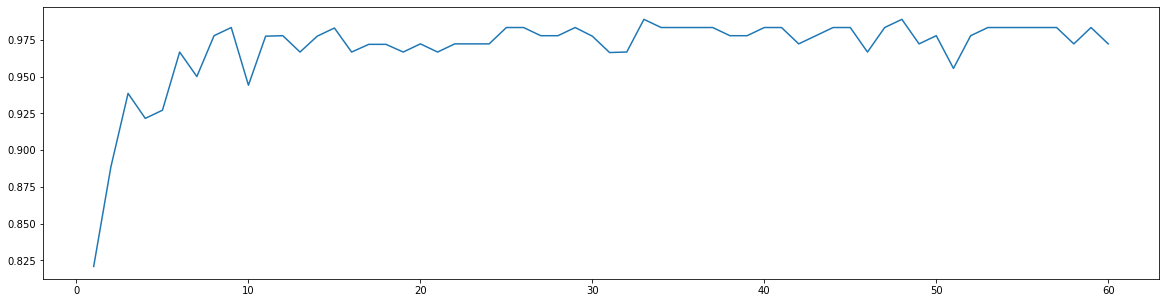

In [13]:
superpa = []
for i in range(60):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,61),superpa)
plt.show()

# 查看随机森林内部决策树的内容

In [19]:
rfc = RandomForestClassifier(n_estimators=20, random_state=2)
rfc = rfc.fit(x_train, y_train)

In [20]:
rfc.estimators_[0].random_state

1872583848

In [21]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [22]:
rfc.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1872583848)

# 通过有放回的抽样构建不同的分类器

通过有放回的随即抽样大概会获得60%的数据进行训练，我们可以用那些没有被抽取到的数据（袋外数据）用作测试。 通过oob_score参数获得测试分数。

In [23]:
rfc = RandomForestClassifier(n_estimators=25, oob_score=True)
rfc.fit(wine.data, wine.target)

rfc.oob_score_

0.9550561797752809

In [24]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(x_train, y_train)
rfc.score(x_test,y_test)

0.9814814814814815

In [25]:
rfc.feature_importances_

array([0.17068594, 0.03787218, 0.01785027, 0.04574399, 0.03594302,
       0.03196958, 0.2340456 , 0.01710557, 0.02496142, 0.13991445,
       0.05117002, 0.04581982, 0.14691814])

In [26]:
rfc.apply(x_test)

array([[ 9,  7,  1, ...,  7,  2,  1],
       [ 3, 12, 13, ..., 12, 12, 12],
       [11, 11,  1, ...,  7,  4,  9],
       ...,
       [ 9,  7,  1, ...,  7,  2,  1],
       [ 3, 11, 13, ..., 12, 12, 12],
       [11,  3,  4, ...,  8,  7,  4]])

In [27]:
rfc.predict(x_test)

array([1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 1,
       0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2,
       1, 1, 2, 1, 2, 0, 0, 1, 0, 2])

In [28]:
rfc.predict_proba(x_test)

array([[0.04, 0.96, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.28, 0.64, 0.08],
       [0.  , 1.  , 0.  ],
       [0.08, 0.92, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.8 , 0.16, 0.04],
       [0.04, 0.12, 0.84],
       [0.84, 0.04, 0.12],
       [0.  , 0.04, 0.96],
       [0.04, 0.76, 0.2 ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.76, 0.24, 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.88, 0.12],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.56, 0.44, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.04, 0.84, 0.12],
       [0.  , 0.96, 0.04],
       [0.92, 0.04, 0.04],
       [0.8 , 0.2 , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 0.88, 0.12],
       [1.  , 0.  , 0.  ],
       [0.  , 0.16, 0.84],
       [0.92, 0.04, 0.04],
       [0.96, 0.  , 0.04],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.16, 0.68, 0.16],
       [0.96, 0.04, 0.  ],
 

基学习器必须获得超过随即分类的准确率即50%，否则随即森林效果会很差

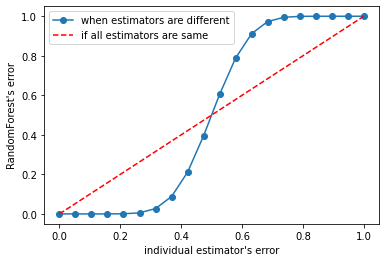

In [35]:
from scipy.special import comb

x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i))
        for i in range(13,26)]).sum()
    y.append(E)

plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()